In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Data set de la poblacion de estados unidos hasta el 2020, dataset de kaggle**

In [96]:
df = pd.read_csv('population_usa.csv')

In [97]:
df

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,U.S. Global Rank
0,2020,331002651,0.59,1937734,954806,38.3,1.78,36,82.8,273975139,4.25,7794798739,3
1,2019,329064917,0.60,1968652,954806,37.7,1.85,36,82.5,271365914,4.27,7713468100,3
2,2018,327096265,0.62,2011509,954806,37.7,1.85,36,82.2,268786714,4.29,7631091040,3
3,2017,325084756,0.64,2068761,954806,37.7,1.85,36,81.9,266243516,4.31,7547858925,3
4,2016,323015995,0.67,2137685,954806,37.7,1.85,35,81.7,263743312,4.33,7464022049,3
5,2015,320878310,0.76,2373367,992343,37.6,1.88,35,81.4,261287811,4.35,7379797139,3
6,2010,309011475,0.93,2803593,1085751,36.9,2.06,34,80.7,249297076,4.44,6956823603,3
7,2005,294993511,0.93,2656520,1066979,36.1,2.04,32,80.0,235892407,4.51,6541907027,3
8,2000,281710909,1.22,3309433,1771991,35.2,2.00,31,79.1,222927913,4.59,6143493823,3
9,1995,265163745,1.01,2608687,892751,34.0,2.03,29,77.4,205240402,4.62,5744212979,3


In [92]:
df.shape
#18 filas por 13 columnas 

(18, 13)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          18 non-null     int64  
 1   Population                    18 non-null     int64  
 2   Yearly % Change               18 non-null     float64
 3   Yearly Change                 18 non-null     int64  
 4   Migrants (net)                18 non-null     int64  
 5   Median Age                    18 non-null     float64
 6   Fertility Rate                18 non-null     float64
 7   Density (P/Km²)               18 non-null     int64  
 8   Urban Pop %                   18 non-null     float64
 9   Urban Population              18 non-null     int64  
 10  Country's Share of World Pop  18 non-null     float64
 11  World Population              18 non-null     int64  
 12  U.S. Global Rank              18 non-null     int64  
dtypes: floa

Text(0.5, 1.0, 'Yearly Change')

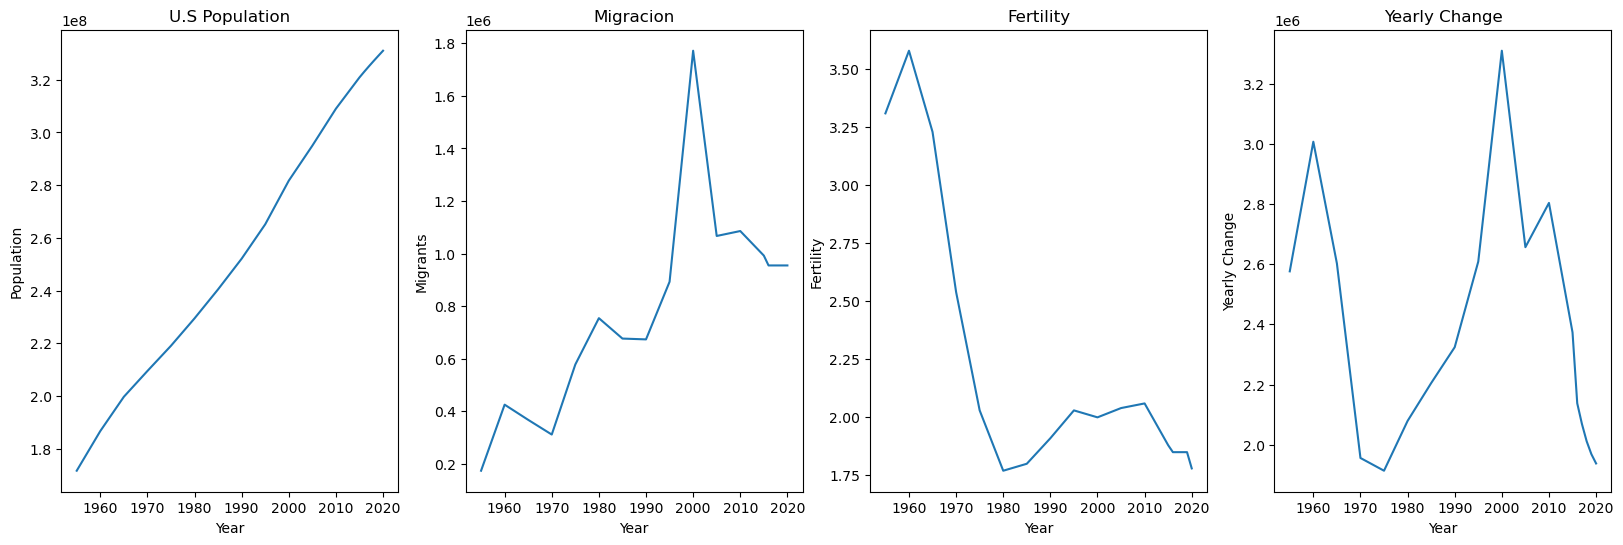

In [150]:
fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(20,6))

axes[0].plot(df['Year'],df['Population'])
axes[0].set_ylabel("Population")
axes[0].set_xlabel("Year")
axes[0].set_title("U.S Population")

axes[1].plot(df['Year'],df['Migrants (net)'])
axes[1].set_ylabel("Migrants")
axes[1].set_xlabel("Year")
axes[1].set_title("Migracion")

axes[2].plot(df['Year'],df['Fertility Rate'])
axes[2].set_ylabel("Fertility")
axes[2].set_xlabel("Year")
axes[2].set_title("Fertility")


axes[3].plot(df['Year'],df['Yearly Change'])
axes[3].set_ylabel("Yearly Change")
axes[3].set_xlabel("Year")
axes[3].set_title("Yearly Change")

Ha aumentado la poblacion y la migracion, disminuye la tasa de fertilidad y que hubo un mayor crecimiento en la decada de los 60 y ha injcios de siglo 

In [152]:
# como queremos predecir la poblacion usando regresion lineal, asignamos x las variables independienteds
# Y es la variable dependiente, lo que queremos calcular es la poblacion 
X = df.drop('Population',axis = 1)
y = df['Population']

****Creamos nuestro modelo de entreamiento****

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#debido a que es una muestra pequena asignamos el 70% al entrenamiento y 30 al test

In [170]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [174]:
test_predictions = model.predict(X_test) #predecimmos con los valores de x
test_predictions
# Estos valores predichos se tiene que usar para calculas el error absoluto medio y el error cuadratico

array([3.11382285e+08, 1.94644416e+08, 3.39681731e+08, 3.25809822e+08,
       3.15343324e+08, 2.05182049e+08])

In [176]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [180]:
MAE = mean_absolute_error(y_test, test_predictions) # la diferencia entre lo real y lo predicho

In [184]:
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [190]:
print(f"El error abosulto medio es  {MAE}  y el errro cuadratico {RMSE}")

El error abosulto medio es  12432576.461761475  y el errro cuadratico 13596905.42677343


In [ ]:
#las predicciones población se desvían de los valores reales en aproximadamente 12.4 millones de personas.
